In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import os

In [ ]:
dataset = pd.read_csv(r"/content/HL_A_Scorecard_Data.csv")

In [ ]:
print(dataset.shape)

(20000, 27)


#Finding out missing values

In [ ]:
dataset.isnull().mean()
#As "Marital status" column doesn't play a significant role in the analysis hence the missing values are untouched.

,0
prospect_no,0.00000
loan_disb_date,0.00000
asset_cost,0.00000
disb_amt,0.00000
down_payment,0.00000
roi,0.00000
age,0.00000
is_exist_cust,0.00000
dist_from_off,0.00920
is_expat,0.00000


In [ ]:
dataset.head()

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
0,1,21-11-2015,1467032,1100274,366758,16,48,0,29.0,0,...,Middle Class,Apartment,Owned,2,40,240,28,75,0,0.622896
1,2,05-11-2015,1113349,734810,378539,15,50,0,11.0,1,...,Below Avg,Villa,Rented,1,41,132,21,66,0,0.107378
2,3,01-12-2015,1660092,979454,680638,14,45,0,53.0,1,...,Below Avg,Villa,Rented,2,34,156,50,59,0,0.110078
3,4,06-10-2015,1061768,902503,159265,14,49,0,8.0,1,...,Middle Class,Apartment,Owned,2,41,120,19,85,0,0.144848
4,5,31-01-2015,1212534,836648,375886,19,36,0,48.0,0,...,Middle Class,Apartment,Owned,2,45,108,75,69,0,0.266234


In [ ]:
#Actual dataset is in "data" variable now.
data = dataset.copy()

In [ ]:
#TRAIN - TEST split
import numpy as np
dev, val, holdout = np.split(dataset.sample(frac = 1, random_state = 1), [int(0.5*len(dataset)), int(0.8*len(dataset))])
(len(dev), len(val), len(holdout))

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(10000, 6000, 4000)

In [ ]:
print("Population Defualt Rate : ", round(sum(dataset.target)*100/len(dataset),2),"%")
print("Develompement Sample Default Rate : ", round(sum(dev.target)*100/len(dev),2),"%")
print("Validation Sample Default Rate : ", round(sum(val.target)*100/len(val),2),"%")
print("Holdout Sample Default Rate : ", round(sum(holdout.target)*100/len(holdout),2),"%")

Population Defualt Rate :  7.0 %
Develompement Sample Default Rate :  7.16 %
Validation Sample Default Rate :  6.88 %
Holdout Sample Default Rate :  6.75 %


In [ ]:
#Profiling - of the Dev. Sample
#Summary Statistics
dev.describe(include="all")

,prospect_no,loan_disb_date,asset_cost,disb_amt,down_payment,roi,age,is_exist_cust,dist_from_off,is_expat,...,locality,accommodation_type,current_residence,veh_own,foir,tenure,vin_in_business,ltv,target,random
count,10000.000000,10000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,9917.000000,10000.000000,...,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21-10-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Middle Class,Apartment,Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5312,5861,5305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10012.840000,NaN,1.174586e+06,7.817877e+05,3.927981e+05,15.070700,45.042000,0.185000,22.994656,0.499400,...,NaN,NaN,NaN,1.616900,44.536400,149.008800,38.64260,66.504100,0.071600,0.498604
std,5746.628489,NaN,3.320328e+05,2.738439e+05,2.075723e+05,3.054445,8.018495,0.388317,18.082396,0.500025,...,NaN,NaN,NaN,0.630693,8.701221,56.925839,23.18729,14.040808,0.257837,0.288703
min,1.000000,NaN,3.023490e+05,1.337440e+05,1.733000e+04,8.000000,20.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,26.000000,60.000000,0.00000,40.000000,0.000000,0.000015
25%,5001.750000,NaN,9.741440e+05,5.973235e+05,2.391540e+05,12.000000,42.000000,0.000000,8.000000,0.000000,...,NaN,NaN,NaN,1.000000,39.000000,96.000000,19.00000,55.000000,0.000000,0.248246
50%,10037.500000,NaN,1.186297e+06,7.824205e+05,3.673425e+05,15.000000,46.000000,0.000000,19.000000,0.000000,...,NaN,NaN,NaN,2.000000,45.000000,144.000000,33.00000,66.000000,0.000000,0.497777
75%,14965.500000,NaN,1.378958e+06,9.463802e+05,5.261875e+05,18.000000,50.000000,0.000000,36.000000,1.000000,...,NaN,NaN,NaN,2.000000,51.000000,180.000000,58.00000,76.000000,0.000000,0.749889


#Running One Variable Logistic Regression

In [ ]:
import statsmodels.formula.api as sm
import statsmodels.api as sma
mylogit = sm.glm(formula= "target ~ gender", data = dataset, family = sma.families.Binomial()).fit() #glm = Generalized Linear Model
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                20000
Model:                            GLM   Df Residuals:                    19998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5070.2
Date:                Fri, 18 Apr 2025   Deviance:                       10140.
Time:                        08:33:50   Pearson chi2:                 2.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):          2.877e-06
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6071      0.087    -30.086      0.000      -2.777      -2.437
gender[T.Male]     0.0219      0.091      0.239      0.811      -0.157       0.201
==================================================================================
"""

#Identification of outliers in Developement data

<ipython-input-18-1e465d5609ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="vin_in_business", data = dev, showmeans= True, width = 0.5, palette = "colorblind")


Text(0.5, 0, 'Vintage in business (in Months)')

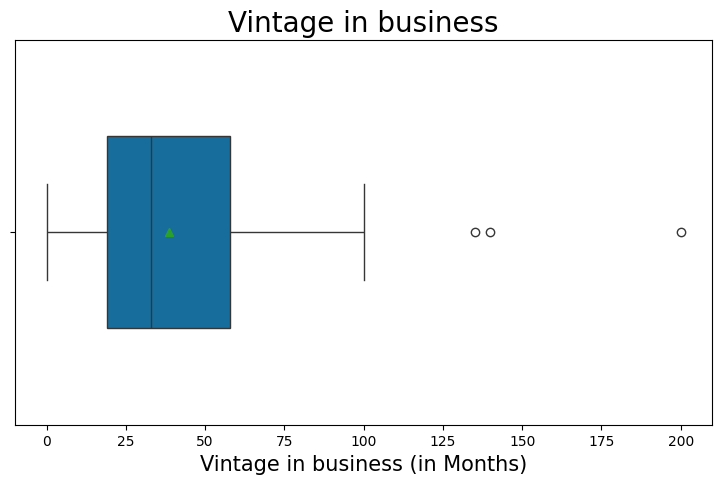

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(x="vin_in_business", data = dev, showmeans= True, width = 0.5, palette = "colorblind")
plt. title("Vintage in business", fontsize = 20)
plt.xlabel("Vintage in business (in Months)", fontsize = 15)

##Outliers - Observations:
1. Outliers detected above the upper limit. Handling it by replacing outlier values by Upper control Limit.

In [ ]:
Q1, Q3 = dev["vin_in_business"].quantile([0.25,0.75])
UCL = Q3 + 1.5*(Q3-Q1)
print("UCL = ", round(UCL))


UCL =  116


In [ ]:
dev["vin_in_business_cap"]=dev["vin_in_business"].map(lambda x: 120 if x>120 else x)

#Missing Value Imputation

##Finding variables having missing values

In [ ]:
missing_dataset = dev.isnull().sum(axis = 0)
missing_dataset = missing_dataset[missing_dataset != 0]
missing_dataset

,0
dist_from_off,83
marital_status,472


In [ ]:
round(dev["dist_from_off"].mean())

23

#Maintaining DATA INTEGRITY -

##1. Distance from office i.e. "dist_from_off" feature can be considered into the analysis hence, replacing the missing values by the mean of the feature.
##2. As "marital_status" is subjected to individual constarints and not impactful in the analysis hence, leaving it as it is.

In [ ]:
dev["dist_from_off_imputed"] = dev["dist_from_off"].fillna(round(dev["dist_from_off"].mean()))

#Hypothesis Testing

Already compared the relationship of DEFAULT Rate with repect to GENDER of the customer. In line 16.

Now,

###1. Testing the relationship between DEFAULT Rate and LTV(Loan to Value) feature.

Ho = Heigher the LTV leads to Higher DEFAULT Rate

Ha = Heigher LTV doesn't lead to high DEFAULT Rate

In [26]:
mylogit = sm.glm(formula= "target ~ ltv", data = dev, family = sma.families.Binomial()).fit() #glm = Generalized Linear Model
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.1
Date:                Fri, 18 Apr 2025   Deviance:                       5014.3
Time:                        09:07:38   Pearson chi2:                 9.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01399
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8327      0.205    -23.565      0.000      -5.235      -4.431
ltv            0.0328      0.003     11.723      0.000       0.027       0.038
==============================================================================
"""

Logic & Interpretations: Assuming a(alpha value) = 0.001. So, the Confidence Interval (C.I.) where the significant observations lie = 99.9%

Answer: Accepting the NULL HYPOTHESIS (Ho) and Rejecting the Alternate Hypothesis.

Conclusion: Heigher the LTV, heigher are the chances of the customer to default.

In [28]:
mylogit = sm.glm(formula= "target ~ foir", data = dev, family = sma.families.Binomial()).fit() #glm = Generalized Linear Model
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.7
Date:                Fri, 18 Apr 2025   Deviance:                       5151.5
Time:                        09:28:36   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):          0.0003668
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9446      0.204    -14.401      0.000      -3.345      -2.544
foir           0.0085      0.004      1.916      0.055      -0.000       0.017
==============================================================================
"""